Combining the fusion.py code with the ComPat stochastic inducer
======================================================



In [1]:
%matplotlib inline
#notebook
import numpy as np
import fusion
import matplotlib.pyplot as plt
plt.ion()
import scipy.constants  
eV = scipy.constants.eV
import ComPat
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/mp/0nb6p8r96hg3157l6qwtf418000ctx/T/ipykernel_45867/2006679104.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


**fusion.solve_Te** solves

$$\frac{3}{2}\;\frac{\partial}{\partial t}\left(n(\rho,t) T(\rho,t)\right) =
    \nabla_\rho \left[ n(\rho,t) \chi(\rho,t) \nabla_\rho
    (T(\rho,t))\right] + S(\rho, t)$$

with a boundary condition given by $Te_{bc}$ and an initial
uniform temperatore of 1000 eV; the quantities are

- $n(\rho,t)$ characterizes the plasma density

- $\chi(\rho,t)$ characterizes the thermal conductivity

- $S(\rho,t)$ characterizes the source

The geometry of the simulation is characterised by the minor radius
$a_0$, major radius $R_0$ and elongation $E_0$
(while the geometry is solved in the cylindrical approximation, the
actual radius used, $a$, is adjusted on the basis of $a_0$
and $E_0$).

Use the default case as the basis.

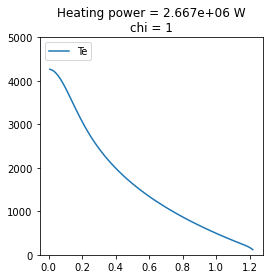

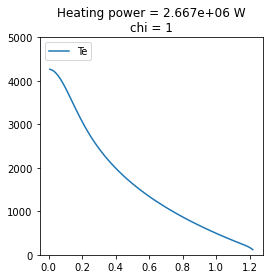

In [2]:
Te, ne, rho, rho_norm, Qe, V = fusion.solve_Te()

Calculate the flux by differentiation and by integration of the source.

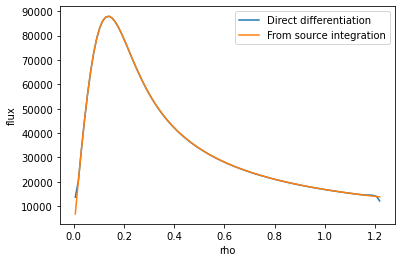

In [3]:
Gd = -np.gradient(Te, rho) * ne * eV
 
Gi = np.cumsum(Qe *  np.diff(rho).mean() * rho) / (rho + np.diff(rho).mean()/2)
Gi = np.append([Gi[0]/2],(Gi[1:]+Gi[:-1])/2)

plt.figure()
plt.plot( rho, Gd, label='Direct differentiation' )
plt.plot( rho, Gi, label='From source integration' )
plt.legend(loc=0)
plt.xlabel('rho')
plt.ylabel('flux');

Parameters for the ComPat stochastic model
- Starting flux, destination flux and overshoot level all set by the steady state flux at mid radius
- 100 points of which the first 10 are overshoot and the remaining 90 the "steady-state" phase

In [4]:
s2 = 0.2; s3 = 0.2; d2 = 10; d3 = 10
N1 = 10; N2 = 90; N3 = 30
l1 = np.log10(Gi[Gi.shape[0]//2])
l2 = l1; l3 = l1
x1 = l1; x2 = l1**2

First just calculate what the stochastic flux is, and the derived chi assuming the initial Te.

Note that each block is just a restart from the initial state.

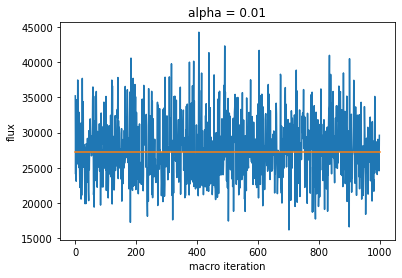

In [5]:
alpha=0.01

runs = {}
for N in  np.arange(0,1000): 
  runs[N] = {}
  runs[N]['x'], runs[N]['mean'], runs[N]['std'], runs[N]['xrange'], runs[N]['x1'], runs[N]['x2'] = \
    ComPat.randomize(N1, N2, N3, l1, l2, l3, s2, s3, d2, d3, x1, x2, alpha)
  runs[N]['chi'] = 10 ** runs[N]['x1'] / Gd[Gd.shape[0]//2]

plt.figure()
plt.plot(10**np.array([r['x1'] for r in runs.values()]))
plt.xlabel('macro iteration')
plt.ylabel('flux')
plt.plot([0,1000], [10**x1, 10**x1])
plt.title('alpha = %s' % (alpha));

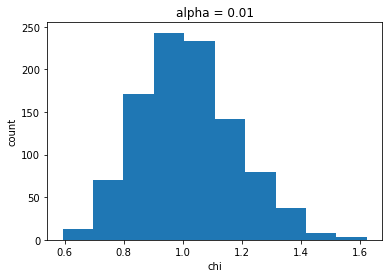

In [6]:
plt.figure()
plt.hist(np.array([r['chi'] for r in runs.values()]))
plt.xlabel('chi')
plt.ylabel('count')
plt.title('alpha = %s' % (alpha));

Now we will calculate the steady state Te profile for each of the cases

In [7]:
for N in  np.arange(0,1000): 
  print(N)
  runs[N]['Te'], runs[N]['ne'], runs[N]['rho'], runs[N]['rho_norm'], runs[N]['Qe'], runs[N]['V'] = \
    fusion.solve_Te(chi = runs[N]['chi'], plots=False)

0
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
1
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
2
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
3
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
4
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
5
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
6
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
7
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
8
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
9
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
10
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
11
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
12
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
13
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
14
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
15
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
16
Volume = 88.8264396098042 m^3
H

143
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
144
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
145
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
146
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
147
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
148
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
149
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
150
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
151
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
152
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
153
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
154
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
155
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
156
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
157
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
158
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
159
Volu

285
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
286
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
287
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
288
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
289
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
290
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
291
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
292
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
293
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
294
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
295
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
296
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
297
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
298
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
299
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
300
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
301
Volu

426
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
427
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
428
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
429
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
430
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
431
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
432
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
433
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
434
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
435
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
436
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
437
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
438
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
439
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
440
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
441
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
442
Volu

564
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
565
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
566
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
567
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
568
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
569
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
570
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
571
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
572
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
573
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
574
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
575
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
576
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
577
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
578
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
579
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
580
Volu

705
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
706
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
707
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
708
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
709
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
710
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
711
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
712
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
713
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
714
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
715
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
716
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
717
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
718
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
719
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
720
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
721
Volu

841
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
842
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
843
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
844
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
845
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
846
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
847
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
848
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
849
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
850
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
851
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
852
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
853
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
854
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
855
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
856
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
857
Volu

981
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
982
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
983
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
984
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
985
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
986
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
987
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
988
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
989
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
990
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
991
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
992
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
993
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
994
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
995
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
996
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
997
Volu

Plot the temperatures for all of the cases

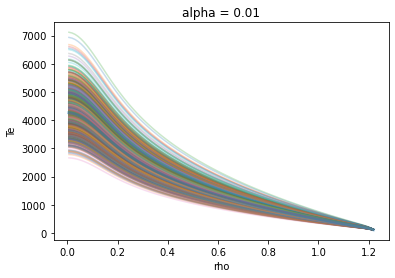

In [8]:
plt.figure()
for k, v in runs.items():
  plt.plot(v['rho'], v['Te'], label=k, alpha=0.25)
plt.plot(rho, Te, linewidth=3, alpha=0.5, label='REF')
plt.xlabel('rho')
plt.ylabel('Te')
plt.title('alpha = %s' % (alpha));

And now look at the distribution function of the core Te

4265.361759529173
4303.937234358241 686.9328228575791


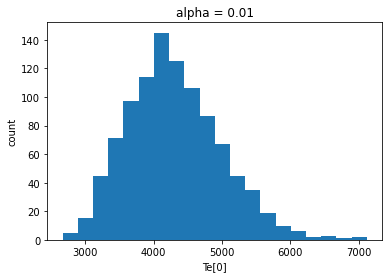

In [9]:
Te_runs = np.array([r['Te'] for r in runs.values()])
plt.figure()
plt.hist(Te_runs[:,0], bins=20)
print(Te[0])
print(np.mean(Te_runs, axis=0)[0], np.std(Te_runs, axis=0)[0])
plt.xlabel('Te[0]')
plt.ylabel('count')
plt.title('alpha = %s' % (alpha));

Now consider the approach to steady-state where the initial flux is 10% of the steady-state flux.

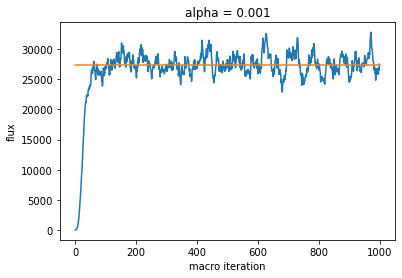

In [10]:
alpha=0.001
l1_c = x1/10
x1_c = x1/10

new_runs = {}
for N in np.arange(0,1000): 
  new_runs[N] = {}
  new_runs[N]['x'], new_runs[N]['mean'], new_runs[N]['std'], new_runs[N]['xrange'], new_runs[N]['x1'], new_runs[N]['x2'] = \
    ComPat.randomize(N1, N2, N3, l1=l1_c, l2=l2, l3=l3, s2=s2, s3=s3, d2=d2, d3=d3, x1=x1_c, x2=x2, alpha=alpha)
  x1_c = new_runs[N]['x1']
  l1_c = x1_c
  new_runs[N]['chi'] = 10 ** new_runs[N]['x1'] / Gd[Gd.shape[0]//2]

plt.figure()
plt.plot(10**np.array([r['x1'] for r in new_runs.values()]))
plt.xlabel('macro iteration')
plt.ylabel('flux')
plt.plot([0,1000], [10**x1, 10**x1])
plt.title('alpha = %s' % (alpha));

In [11]:
for N in np.arange(0,1000): 
  print(N)
  new_runs[N]['Te'], new_runs[N]['ne'], new_runs[N]['rho'], new_runs[N]['rho_norm'], new_runs[N]['Qe'], new_runs[N]['V'] = \
    fusion.solve_Te(chi = new_runs[N]['chi'], plots=False)

0
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
1
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
2
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
3
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
4
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
5
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
6
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
7
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
8
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
9
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
10
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
11
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
12
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
13
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
14
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
15
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
16
Volume = 88.8264396098042 m^3
H

Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
137
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
138
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
139
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
140
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
141
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
142
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
143
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
144
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
145
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
146
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
147
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
148
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
149
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
150
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
151
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
152
Volume =

279
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
280
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
281
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
282
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
283
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
284
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
285
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
286
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
287
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
288
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
289
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
290
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
291
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
292
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
293
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
294
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
295
Volu

413
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
414
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
415
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
416
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
417
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
418
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
419
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
420
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
421
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
422
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
423
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
424
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
425
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
426
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
427
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
428
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
429
Volu

551
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
552
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
553
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
554
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
555
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
556
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
557
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
558
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
559
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
560
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
561
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
562
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
563
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
564
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
565
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
566
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
567
Volu

692
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
693
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
694
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
695
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
696
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
697
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
698
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
699
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
700
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
701
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
702
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
703
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
704
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
705
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
706
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
707
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
708
Volu

831
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
832
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
833
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
834
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
835
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
836
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
837
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
838
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
839
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
840
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
841
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
842
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
843
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
844
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
845
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
846
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
847
Volu

968
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
969
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
970
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
971
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
972
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
973
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
974
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
975
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
976
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
977
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
978
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
979
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
980
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
981
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
982
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
983
Volume = 88.8264396098042 m^3
Heating power = 2.000e+06 W
984
Volu

Plot the central Te as a function of macro iteration number.

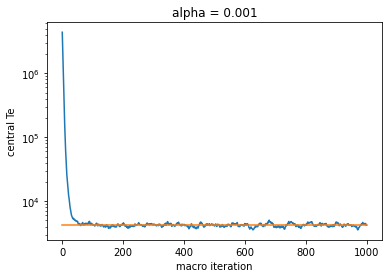

In [12]:
Te_runs = np.array([r['Te'] for r in new_runs.values()])
plt.figure()
plt.semilogy(Te_runs[:,0])
plt.xlabel('macro iteration')
plt.ylabel('central Te')
plt.plot([0,1000], [Te[0], Te[0]])
plt.title('alpha = %s' % (alpha));

And now look at the distribution of central Te

4265.361759529173
16732.61184223702 179970.45309011827


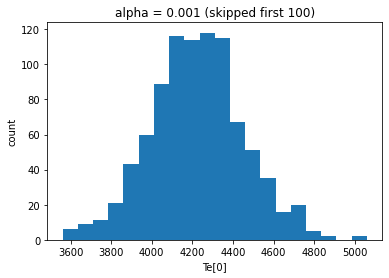

In [13]:
plt.figure()
plt.hist(Te_runs[100:,0], bins=20)
plt.xlabel('Te[0]')
plt.ylabel('count')
plt.title('alpha = %s (skipped first 100)' % (alpha))
print(Te[0])
print(np.mean(Te_runs, axis=0)[0], np.std(Te_runs, axis=0)[0])

4265.361759529173
4224.411393387389 228.2313444198988


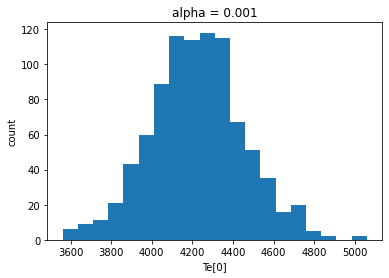

In [14]:
plt.figure()
plt.hist(Te_runs[100:,0], bins=20)
plt.xlabel('Te[0]')
plt.ylabel('count')
plt.title('alpha = %s' % (alpha))
print(Te[0])
print(np.mean(Te_runs[100:], axis=0)[0], np.std(Te_runs[100:], axis=0)[0])